# [주제] 고객 세분화(Customer Segmentation)


+ 데이터를 기반으로 고객들을 유의미한 그룹으로 세분화하는 Segmentation
작업을 수행해야 합니다.
+ 회원가입, 구매이력 등 다양한 고객 데이터를 기반으로 유의미한 Segment를
구성해주세요.

- customerId	고객 ID	398590328
- email	Email 주소	hakdnklm@abcd.com
- joindate	회원가입일	2020-05-02
- first_purchase_date	첫 구매일	2020-05-03
- last_purchase_date	마지막 구매일	2021-04-02
- last_category	마지막 구매 카테고리	A or B or C or D
		
- count	직전 1년간 총 구매횟수	4
- revenue	직전 1년간 총 구매금액	₩200,043
- x_sell_yn	직전 1년간 교차구매 여부	y/n
		
- active_1m	당월 유입 여부	y/n
- purchase_1m	당월 구매 여부	y/n

* 과제를 진행하는 시점은 2021년 5월 1일
- 고객 세분화를 완료하고 비즈니스 현황에 대해서 예측

## 데이터 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings(action='ignore') #경고 메세지 안나오게 함

In [2]:
df = pd.read_csv("..\desktop\직무부트캠프_crm\crm_rawdata1.csv")
df.head()

,No,customerId,email,joindate,first_purchase_date,last_purchase_date,last_category,count,revenue,x_sell_yn,active_1m,purchase_1m
0,1,3256206662,tryam0@odnoklassniki.ru,2020. 3. 1,NaN,NaN,NaN,0,0,n,n,n
1,2,2022307097,lfloyd1@hhs.gov,2020. 10. 20,NaN,NaN,NaN,0,0,n,y,y
2,3,3125361575,dbauser2@google.com.br,2020. 4. 28,2020. 6. 15,2020. 6. 15,B,1,790560,n,n,n
3,4,7608079371,gsanger3@eventbrite.com,2020. 12. 19,NaN,NaN,NaN,0,0,n,y,y
4,5,3094579205,mgawthrope4@si.edu,2021. 1. 26,NaN,NaN,NaN,0,0,n,y,n


In [3]:
df.info()
#1000명 중 구매가 일어난 사람 379명
#customerId 중복 없음. df.customerId.value_counts()
#email 중복 없음. df.email.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No                   1000 non-null   int64 
 1   customerId           1000 non-null   int64 
 2   email                1000 non-null   object
 3   joindate             1000 non-null   object
 4   first_purchase_date  379 non-null    object
 5   last_purchase_date   379 non-null    object
 6   last_category        379 non-null    object
 7   count                1000 non-null   int64 
 8   revenue              1000 non-null   int64 
 9   x_sell_yn            1000 non-null   object
 10  active_1m            1000 non-null   object
 11  purchase_1m          1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


(D    108
 A     92
 B     91
 C     88
 Name: last_category, dtype: int64,
 <AxesSubplot:xlabel='last_category', ylabel='count'>)

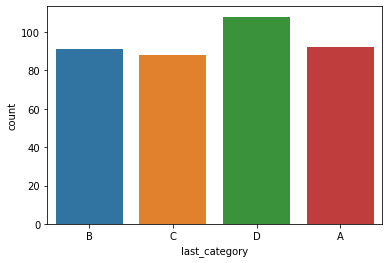

In [4]:
#마지막 구매 카테고리
df.last_category.value_counts(), sns.countplot(df.last_category)

<AxesSubplot:xlabel='count', ylabel='count'>

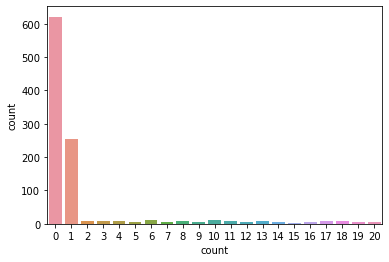

In [5]:
#작년 구매 횟수
#0,1이 압도적
sns.countplot(df['count'])

In [6]:
#1년간 총 구매금액으로 내림차순 - 379명
df[df['revenue'] > 0].sort_values('revenue', ascending = False)

,No,customerId,email,joindate,first_purchase_date,last_purchase_date,last_category,count,revenue,x_sell_yn,active_1m,purchase_1m
136,137,8032749713,pquinnette3s@eepurl.com,2020. 6. 18,2020. 10. 18,2021. 1. 17,B,14,996485,y,n,n
553,554,2913614892,ekennewellfd@sfgate.com,2020. 4. 15,2020. 12. 11,2021. 2. 9,A,16,995358,y,y,y
156,157,4056292213,lmckintosh4c@blogger.com,2020. 3. 5,2020. 10. 9,2020. 10. 9,A,1,994015,n,n,n
969,970,1279119861,lbailessqx@so-net.ne.jp,2021. 2. 9,2021. 3. 13,2021. 3. 13,A,1,992618,n,n,n
677,678,7526608966,romolanit@ning.com,2020. 7. 18,2021. 2. 13,2021. 2. 13,B,1,992470,n,y,n
...,...,...,...,...,...,...,...,...,...,...,...,...
813,814,2692771850,jbolleyml@shinystat.com,2020. 8. 8,2021. 1. 15,2021. 1. 15,A,1,14617,n,y,y
105,106,4173910576,bespinas2x@behance.net,2020. 11. 8,2020. 11. 25,2020. 11. 25,B,1,13869,n,y,n
786,787,3471224289,mgiacubolu@hatena.ne.jp,2020. 9. 15,2021. 1. 6,2021. 1. 6,D,1,13279,n,n,n
230,231,4397046115,crosingdall6e@washington.edu,2020. 7. 15,2020. 11. 24,2020. 12. 30,C,4,8906,n,n,n


(n    937
 y     63
 Name: x_sell_yn, dtype: int64,
 <AxesSubplot:xlabel='x_sell_yn', ylabel='count'>)

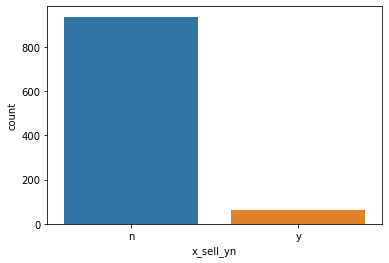

In [7]:
#1년간 교차구매 여부
df.x_sell_yn.value_counts(), sns.countplot(df.x_sell_yn)

(y    505
 n    495
 Name: active_1m, dtype: int64,
 <AxesSubplot:xlabel='active_1m', ylabel='count'>)

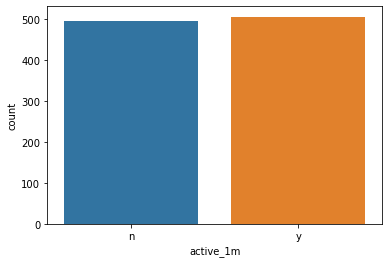

In [8]:
#당월 유입 여부
df.active_1m.value_counts(), sns.countplot(df.active_1m)

(n    744
 y    256
 Name: purchase_1m, dtype: int64,
 <AxesSubplot:xlabel='purchase_1m', ylabel='count'>)

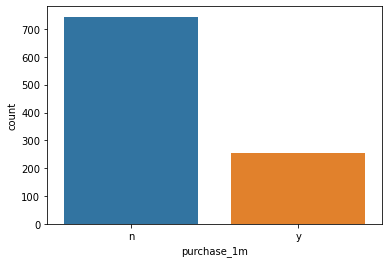

In [9]:
#당월 구매 여부
df.purchase_1m.value_counts(), sns.countplot(df.purchase_1m)

In [10]:
#python에서 처리 가능한 데이터 타입 만들어주기
#last_category -> 원핫인코딩
#x_sell_yn, purchase_1m, active_1m -> 원핫인코딩
df = pd.get_dummies(data = df, columns = ['last_category'], prefix = 'last_category')
df = pd.get_dummies(data = df, columns = ['x_sell_yn'], prefix = 'x_sell_yn')
df = pd.get_dummies(data = df, columns = ['purchase_1m'], prefix = 'purchase_1m')
df = pd.get_dummies(data = df, columns = ['active_1m'], prefix = 'active_1m')
df.head()

,No,customerId,email,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y
0,1,3256206662,tryam0@odnoklassniki.ru,2020. 3. 1,NaN,NaN,0,0,0,0,0,0,1,0,1,0,1,0
1,2,2022307097,lfloyd1@hhs.gov,2020. 10. 20,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
2,3,3125361575,dbauser2@google.com.br,2020. 4. 28,2020. 6. 15,2020. 6. 15,1,790560,0,1,0,0,1,0,1,0,1,0
3,4,7608079371,gsanger3@eventbrite.com,2020. 12. 19,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
4,5,3094579205,mgawthrope4@si.edu,2021. 1. 26,NaN,NaN,0,0,0,0,0,0,1,0,1,0,0,1


In [11]:
# No, customerId, email drop하기
df.drop(['No','email'], axis=1, inplace=True)

In [12]:
#결측치 0으로 대체
#df.fillna(0, inplace=True)

In [13]:
#정리된 데이터셋
df.head()

,customerId,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y
0,3256206662,2020. 3. 1,NaN,NaN,0,0,0,0,0,0,1,0,1,0,1,0
1,2022307097,2020. 10. 20,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
2,3125361575,2020. 4. 28,2020. 6. 15,2020. 6. 15,1,790560,0,1,0,0,1,0,1,0,1,0
3,7608079371,2020. 12. 19,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
4,3094579205,2021. 1. 26,NaN,NaN,0,0,0,0,0,0,1,0,1,0,0,1


## 세그먼트 해보기 

데이터에 들어있는 RFM 변수 확인하기

- R : retention, recency 재방문율 재구매율 -> active_1m / purchase_1m Y/N
- F : frequency -> count
- M : monetary -> revenue

### 구매가 일어난 고객 VS 구매가 없는 고객

목적 : 구매가 1번 일어난 고객 특성 파악해서 0번 고객에서 -> 1번 고객이 될 수 있도록 한다

- 가입하고 구매 일어날 때까지의 기간을 새 변수로 추가

In [14]:
df1 = df.copy()
df1.head()

,customerId,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y
0,3256206662,2020. 3. 1,NaN,NaN,0,0,0,0,0,0,1,0,1,0,1,0
1,2022307097,2020. 10. 20,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
2,3125361575,2020. 4. 28,2020. 6. 15,2020. 6. 15,1,790560,0,1,0,0,1,0,1,0,1,0
3,7608079371,2020. 12. 19,NaN,NaN,0,0,0,0,0,0,1,0,0,1,0,1
4,3094579205,2021. 1. 26,NaN,NaN,0,0,0,0,0,0,1,0,1,0,0,1


In [15]:
#가입하고 구매 일어날 때까지의 기간을 새 변수로 추가
df1['joindate'] = pd.to_datetime(df1['joindate'])
df1['first_purchase_date'] = pd.to_datetime(df1['first_purchase_date'])
df1['last_purchase_date'] = pd.to_datetime(df1['last_purchase_date'])
df1['purchase_join'] = df1['first_purchase_date']-df1['joindate']
df1.head()

,customerId,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
0,3256206662,2020-03-01,NaT,NaT,0,0,0,0,0,0,1,0,1,0,1,0,NaT
1,2022307097,2020-10-20,NaT,NaT,0,0,0,0,0,0,1,0,0,1,0,1,NaT
2,3125361575,2020-04-28,2020-06-15,2020-06-15,1,790560,0,1,0,0,1,0,1,0,1,0,48 days
3,7608079371,2020-12-19,NaT,NaT,0,0,0,0,0,0,1,0,0,1,0,1,NaT
4,3094579205,2021-01-26,NaT,NaT,0,0,0,0,0,0,1,0,1,0,0,1,NaT


In [16]:
#주로 가입 후 시간이 지나야 구매가 발생함
df1['purchase_join'].sort_values(ascending=False)[:200]

613   475 days
875   468 days
362   451 days
208   436 days
371   435 days
        ...   
575   130 days
665   128 days
624   127 days
11    127 days
746   125 days
Name: purchase_join, Length: 200, dtype: timedelta64[ns]

In [17]:
#구매가 일어난 고객
df1_yes = df1[df1['revenue'] > 0].sort_values('revenue', ascending = False)
df1_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 136 to 659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   customerId           379 non-null    int64          
 1   joindate             379 non-null    datetime64[ns] 
 2   first_purchase_date  379 non-null    datetime64[ns] 
 3   last_purchase_date   379 non-null    datetime64[ns] 
 4   count                379 non-null    int64          
 5   revenue              379 non-null    int64          
 6   last_category_A      379 non-null    uint8          
 7   last_category_B      379 non-null    uint8          
 8   last_category_C      379 non-null    uint8          
 9   last_category_D      379 non-null    uint8          
 10  x_sell_yn_n          379 non-null    uint8          
 11  x_sell_yn_y          379 non-null    uint8          
 12  purchase_1m_n        379 non-null    uint8          
 13  purchase_1m_y     

In [18]:
#구매가 없는 고객
df1_no = df1[df1['revenue'] == 0].sort_values('revenue', ascending = False)
df1_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 998
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   customerId           621 non-null    int64          
 1   joindate             621 non-null    datetime64[ns] 
 2   first_purchase_date  0 non-null      datetime64[ns] 
 3   last_purchase_date   0 non-null      datetime64[ns] 
 4   count                621 non-null    int64          
 5   revenue              621 non-null    int64          
 6   last_category_A      621 non-null    uint8          
 7   last_category_B      621 non-null    uint8          
 8   last_category_C      621 non-null    uint8          
 9   last_category_D      621 non-null    uint8          
 10  x_sell_yn_n          621 non-null    uint8          
 11  x_sell_yn_y          621 non-null    uint8          
 12  purchase_1m_n        621 non-null    uint8          
 13  purchase_1m_y       

In [19]:
df1_yes.describe()

# 평균 구매 4
# 평균 판매 515117
# A:B:C:D = 24:24:23:28
# 교차구매 n:y = 83:16
# 이달 구매 n:y = 73:26
# 이달 접속 n:y = 47:52
# 평균 가입 후 구매까지 걸린 시간 151 days = 5개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379
mean,4.889375e+09,4.065963,515117.865435,0.242744,0.240106,0.232190,0.284960,0.833773,0.166227,0.730871,0.269129,0.474934,0.525066,151 days 19:07:26.437994722
std,2.831788e+09,5.415867,288670.328044,0.429308,0.427712,0.422788,0.451992,0.372776,0.372776,0.444094,0.444094,0.500031,0.500031,109 days 10:35:50.100344544
min,1.157771e+07,1.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,2.594228e+09,1.000000,294946.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60 days 00:00:00
50%,4.662706e+09,1.000000,512717.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,134 days 00:00:00
75%,7.323496e+09,5.000000,777217.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,217 days 00:00:00
max,9.943879e+09,20.000000,996485.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,475 days 00:00:00


In [20]:
#구매가 없는 고객 현재일로부터 가입날짜 변수 추가
df1_no['join_now'] = datetime.datetime(2021, 5, 1)-df1_no['joindate']
df1_no.head()

,customerId,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join,join_now
0,3256206662,2020-03-01,NaT,NaT,0,0,0,0,0,0,1,0,1,0,1,0,NaT,426 days
682,1289462739,2020-08-22,NaT,NaT,0,0,0,0,0,0,1,0,1,0,1,0,NaT,252 days
668,263115755,2020-05-11,NaT,NaT,0,0,0,0,0,0,1,0,0,1,0,1,NaT,355 days
669,543099601,2020-06-05,NaT,NaT,0,0,0,0,0,0,1,0,1,0,0,1,NaT,330 days
670,8129138891,2020-04-29,NaT,NaT,0,0,0,0,0,0,1,0,1,0,1,0,NaT,367 days


In [21]:
df1_no.describe()

# 평균 구매 0
# 평균 판매 0
# A:B:C:D = 0
# 교차구매 n:y = 1:0
# 이달 구매 n:y = 75:24
# 이달 접속 n:y = 50:49
# 평균 가입 후 지금까지 시간 198 days = 6.6개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join,join_now
count,6.210000e+02,621.0,621.0,621.0,621.0,621.0,621.0,621.0,621.0,621.000000,621.000000,621.000000,621.000000,0,621
mean,4.993438e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.752013,0.247987,0.507246,0.492754,NaT,198 days 00:02:19.130434782
std,2.923735e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432192,0.432192,0.500351,0.500351,NaT,129 days 03:41:42.608235962
min,1.450030e+07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,NaT,3 days 00:00:00
25%,2.527727e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.000000,NaT,86 days 00:00:00
50%,5.026972e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,NaT,180 days 00:00:00
75%,7.512518e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,1.000000,NaT,306 days 00:00:00
max,9.994458e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,NaT,481 days 00:00:00


### 구매가 1번 일어난 고객 VS 구매가 n번 이상 일어난 고객

두번이상 일어난 고객 띄엄사이 보기

In [22]:
df1_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 136 to 659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   customerId           379 non-null    int64          
 1   joindate             379 non-null    datetime64[ns] 
 2   first_purchase_date  379 non-null    datetime64[ns] 
 3   last_purchase_date   379 non-null    datetime64[ns] 
 4   count                379 non-null    int64          
 5   revenue              379 non-null    int64          
 6   last_category_A      379 non-null    uint8          
 7   last_category_B      379 non-null    uint8          
 8   last_category_C      379 non-null    uint8          
 9   last_category_D      379 non-null    uint8          
 10  x_sell_yn_n          379 non-null    uint8          
 11  x_sell_yn_y          379 non-null    uint8          
 12  purchase_1m_n        379 non-null    uint8          
 13  purchase_1m_y     

In [23]:
#구매가 1번만 일어난 고객
df1_yes_one = df1_yes[df1_yes['first_purchase_date']==df1_yes['last_purchase_date']]
print("전체 고객 중 1번만 구매한 고객 비율: ", len(df1_yes_one.customerId)/len(df1))
print("구매한 고객 중 1번만 구매한 고객 비율: ", len(df1_yes_one.customerId)/len(df1_yes))
df1_yes_one.describe()

# 평균 구매 1
# 평균 판매 508492
# A:B:C:D = 24:23:24:27
# 교차구매 n:y = 1:0
# 이달 구매 n:y = 71:28
# 이달 접속 n:y = 47:52
# 평균 가입 후 구매까지 걸린 시간 175 days = 5.8개월

전체 고객 중 1번만 구매한 고객 비율:  0.247
구매한 고객 중 1번만 구매한 고객 비율:  0.6517150395778364


,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,2.470000e+02,247.0,247.000000,247.000000,247.000000,247.000000,247.000000,247.0,247.0,247.000000,247.000000,247.000000,247.000000,247
mean,4.883830e+09,1.0,508492.623482,0.242915,0.238866,0.242915,0.275304,1.0,0.0,0.712551,0.287449,0.477733,0.522267,175 days 14:11:10.445344130
std,2.833590e+09,0.0,288540.480083,0.429715,0.427257,0.429715,0.447574,0.0,0.0,0.453492,0.453492,0.500518,0.500518,115 days 10:48:01.346779740
min,1.392179e+07,1.0,1440.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1 days 00:00:00
25%,2.571605e+09,1.0,292749.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,83 days 12:00:00
50%,4.714599e+09,1.0,486670.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,0.000000,1.000000,161 days 00:00:00
75%,7.238085e+09,1.0,779280.500000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,261 days 00:00:00
max,9.943879e+09,1.0,994015.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,475 days 00:00:00


In [24]:
#구매가 2번 이상 일어난 고객
df1_yes_more = df1_yes[df1_yes['first_purchase_date']!=df1_yes['last_purchase_date']]
print("전체 고객 중 2번 이상 구매한 고객 비율: ", len(df1_yes_more.customerId)/len(df1))
print("구매한 고객 중 2번 이상 구매한 고객 비율: ", len(df1_yes_more.customerId)/len(df1_yes))

#첫번째 구매후 
df1_yes_more.describe()

# 평균 구매 9.8
# 평균 판매 527515
# A:B:C:D = 24:24:21:30
# 교차구매 n:y = 52:47
# 이달 구매 n:y = 76:23
# 이달 접속 n:y = 46:53
# 평균 가입 후 구매까지 걸린 시간 107 days = 3.5개월

전체 고객 중 2번 이상 구매한 고객 비율:  0.132
구매한 고객 중 2번 이상 구매한 고객 비율:  0.3482849604221636


,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132
mean,4.899752e+09,9.803030,527515.098485,0.242424,0.242424,0.212121,0.303030,0.522727,0.477273,0.765152,0.234848,0.469697,0.530303,107 days 06:32:43.636363636
std,2.839173e+09,5.809231,289602.811294,0.430182,0.430182,0.410368,0.461319,0.501386,0.501386,0.425519,0.425519,0.500982,0.500982,80 days 09:55:54.381250035
min,1.157771e+07,1.000000,8906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,2.722071e+09,5.000000,309062.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46 days 12:00:00
50%,4.586279e+09,10.000000,555396.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,91 days 12:00:00
75%,7.402987e+09,14.250000,776509.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,162 days 00:00:00
max,9.915094e+09,20.000000,996485.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,389 days 00:00:00


### 신규 고객 VS 기존 고객 VS 이탈 고객

In [33]:
#지난달 구매가 없는데, 이번달 구매가 생긴 고객 -> 신규 고객 신규고객 특성 파악
df1_no_1m = df1_no[df1_no['purchase_1m_y'] == 1]
df1_no_1m.describe()

# 평균 구매 0
# 평균 판매 0
# A:B:C:D = 0
# 교차구매 n:y = 1:0
# 이달 구매 n:y = 1:0
# 이달 접속 n:y = 0:1
# 평균 가입 후 지금까지 시간 195 days = 6.6개월


,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join,join_now
count,1.540000e+02,154.0,154.0,154.0,154.0,154.0,154.0,154.0,154.0,154.0,154.0,154.0,154.0,0,154
mean,5.111005e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,195 days 00:00:00
std,2.979912e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,130 days 00:43:52.089790088
min,4.188520e+07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,4 days 00:00:00
25%,2.263046e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,85 days 06:00:00
50%,5.276751e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,161 days 12:00:00
75%,7.672833e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,304 days 00:00:00
max,9.994458e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaT,463 days 00:00:00


In [34]:
df1_no_1m_no = df1_no[df1_no['purchase_1m_y'] == 0]
df1_no_1m_no.describe()

# 평균 구매 0
# 평균 판매 0
# A:B:C:D = 0
# 교차구매 n:y = 1:0
# 이달 구매 n:y = 1:0
# 이달 접속 n:y = 67:32
# 평균 가입 후 지금까지 시간 198 days = 6.6개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join,join_now
count,4.670000e+02,467.0,467.0,467.0,467.0,467.0,467.0,467.0,467.0,467.0,467.0,467.000000,467.000000,0,467
mean,4.954669e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.674518,0.325482,NaT,198 days 23:47:39.957173448
std,2.907165e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469057,0.469057,NaT,128 days 23:43:13.841531706
min,1.450030e+07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,NaT,3 days 00:00:00
25%,2.551070e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,NaT,86 days 00:00:00
50%,4.933776e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,NaT,183 days 00:00:00
75%,7.464570e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,NaT,305 days 12:00:00
max,9.985759e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.000000,NaT,481 days 00:00:00


### 교차 구매가 발생한 고객 VS 발생하지 않은 고객

In [38]:
df1_yes_xsell = df1_yes[df1_yes['x_sell_yn_y']==1]
df1_yes_xsell.describe()

# 평균 구매 10
# 평균 판매 5222342
# A:B:C:D = 25:26:19:28
# 교차구매 n:y = 0:1
# 이달 구매 n:y = 76:23
# 이달 접속 n:y = 50:49
# 평균 가입 후 구매까지 걸린 시간 101 days = 3.3개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.0,63.000000,63.000000,63.000000,63.000000,63
mean,5.022544e+09,10.730159,522342.682540,0.253968,0.269841,0.190476,0.285714,0.0,1.0,0.761905,0.238095,0.507937,0.492063,101 days 14:05:42.857142857
std,2.715214e+09,5.427547,314255.231522,0.438776,0.447443,0.395831,0.455383,0.0,0.0,0.429339,0.429339,0.503953,0.503953,77 days 18:39:37.974947448
min,2.441214e+08,2.000000,24364.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,3 days 00:00:00
25%,3.039563e+09,6.000000,312412.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,40 days 12:00:00
50%,4.605947e+09,10.000000,511686.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,82 days 00:00:00
75%,7.358544e+09,16.000000,826750.500000,0.500000,1.000000,0.000000,1.000000,0.0,1.0,1.000000,0.000000,1.000000,1.000000,153 days 12:00:00
max,9.915094e+09,20.000000,996485.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,313 days 00:00:00


In [39]:
df1_yes_xsell_n = df1_yes[df1_yes['x_sell_yn_n']==1]
df1_yes_xsell_n.describe()

# 평균 구매 2.7
# 평균 판매 513677
# A:B:C:D = 24:23:24:28
# 교차구매 n:y = 1:0
# 이달 구매 n:y = 72:27
# 이달 접속 n:y = 46:53
# 평균 가입 후 구매까지 걸린 시간 161 days = 5.3개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,3.160000e+02,316.000000,316.000000,316.000000,316.000000,316.000000,316.00000,316.0,316.0,316.000000,316.000000,316.000000,316.000000,316
mean,4.862826e+09,2.737342,513677.474684,0.240506,0.234177,0.240506,0.28481,1.0,0.0,0.724684,0.275316,0.468354,0.531646,161 days 19:22:01.518987342
std,2.857884e+09,4.329742,283806.961084,0.428069,0.424155,0.428069,0.45204,0.0,0.0,0.447382,0.447382,0.499789,0.499789,112 days 03:35:35.710683782
min,1.157771e+07,1.000000,1440.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,2.464466e+09,1.000000,293462.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,66 days 18:00:00
50%,4.684053e+09,1.000000,516984.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.0,1.000000,0.000000,0.000000,1.000000,149 days 00:00:00
75%,7.265797e+09,1.000000,766311.250000,0.000000,0.000000,0.000000,1.00000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,228 days 06:00:00
max,9.943879e+09,20.000000,994015.000000,1.000000,1.000000,1.000000,1.00000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,475 days 00:00:00


### 매출을 차지하는 세그먼트가 어딘지 확인 8:2

In [61]:
df1_yes_80 = df1_yes.sort_values(by ='revenue', ascending = False) #379명의 매출중 80%를 차지하는 고객까지 구분
sum_revenue = 0
for i in range(len(df1_yes['revenue'])):
    sum_revenue = sum_revenue+df1_yes['revenue'].iloc[i]
sum_revenue

195229671

In [62]:
df1_yes_80.reset_index(drop=True, inplace=True)
df1_yes_80.head()

,customerId,joindate,first_purchase_date,last_purchase_date,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
0,8032749713,2020-06-18,2020-10-18,2021-01-17,14,996485,0,1,0,0,0,1,1,0,1,0,122 days
1,2913614892,2020-04-15,2020-12-11,2021-02-09,16,995358,1,0,0,0,0,1,0,1,0,1,240 days
2,4056292213,2020-03-05,2020-10-09,2020-10-09,1,994015,1,0,0,0,1,0,1,0,1,0,218 days
3,1279119861,2021-02-09,2021-03-13,2021-03-13,1,992618,1,0,0,0,1,0,1,0,1,0,32 days
4,7526608966,2020-07-18,2021-02-13,2021-02-13,1,992470,0,1,0,0,1,0,1,0,0,1,210 days


In [65]:
# sum_revenue*0.8의 값이 될 때 멈추기
revenue80 = 0
for i in range(len(df1_yes_80['revenue'])):
    if revenue80 < sum_revenue*0.8 :
        revenue80 = revenue80+df1_yes_80['revenue'].iloc[i]
    else :
#        print(i)
        pass

In [64]:
#매출의 80% 담당하고 있는 고객
df1_yes_80 = df1_yes_80[:213]
df1_yes_80.describe()

# 평균 구매 4.0
# 평균 판매 733722
# A:B:C:D = 26:22:23:27
# 교차구매 n:y = 84:15
# 이달 구매 n:y = 75:24
# 이달 접속 n:y = 46:53
# 평균 가입 후 구매까지 걸린 시간 155 days = 5.1개월

#매출의 80% 담당하고 있는 고객

#df1_yes_20 = df1_yes_80[213:]
#df1_yes_20.describe()

# 평균 구매 4.0
# 평균 판매 234619
# A:B:C:D = 21:25:22:30
# 교차구매 n:y = 81:18
# 이달 구매 n:y = 70:29
# 이달 접속 n:y = 49:50
# 평균 가입 후 구매까지 걸린 시간 146 days = 4.8개월

,customerId,count,revenue,last_category_A,last_category_B,last_category_C,last_category_D,x_sell_yn_n,x_sell_yn_y,purchase_1m_n,purchase_1m_y,active_1m_n,active_1m_y,purchase_join
count,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.00000,213.000000,213.000000,213.000000,213.000000,213
mean,4.989059e+09,4.093897,733722.140845,0.267606,0.225352,0.234742,0.272300,0.84507,0.15493,0.751174,0.248826,0.460094,0.539906,155 days 22:05:04.225352112
std,2.851866e+09,5.408816,160344.615293,0.443754,0.418798,0.424836,0.446192,0.36269,0.36269,0.433351,0.433351,0.499579,0.499579,111 days 01:43:44.352138984
min,3.577322e+07,1.000000,454358.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,3 days 00:00:00
25%,2.698964e+09,1.000000,596094.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000,64 days 00:00:00
50%,5.014913e+09,1.000000,735653.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,1.000000,0.000000,0.000000,1.000000,133 days 00:00:00
75%,7.348165e+09,6.000000,880890.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.00000,1.000000,0.000000,1.000000,1.000000,218 days 00:00:00
max,9.943879e+09,20.000000,996485.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,475 days 00:00:00


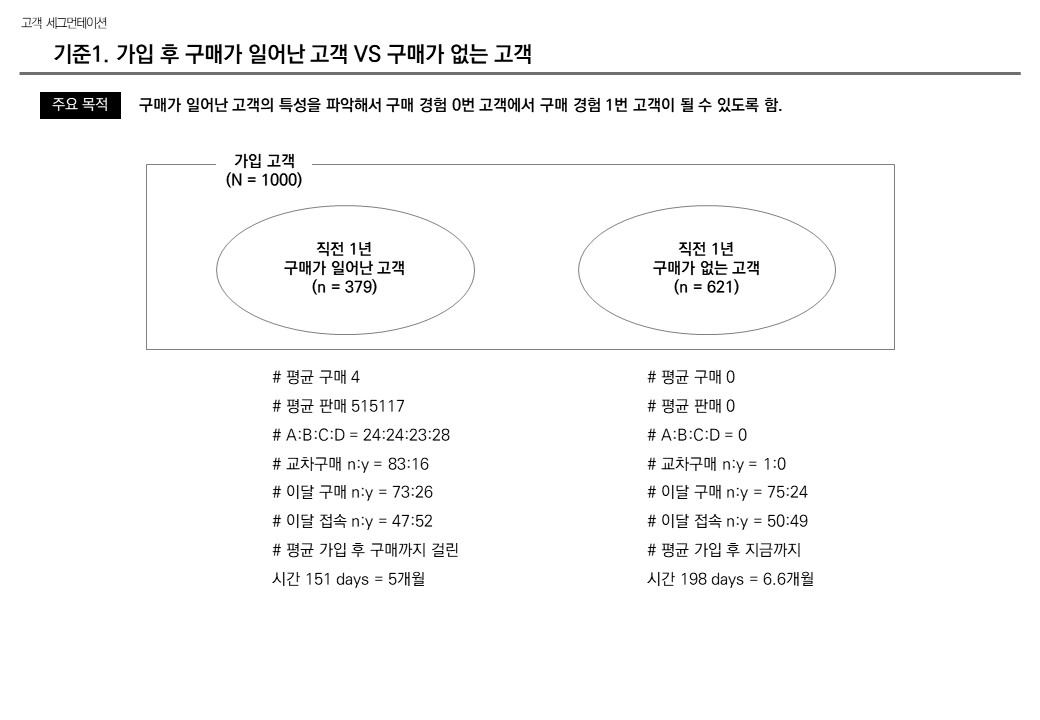

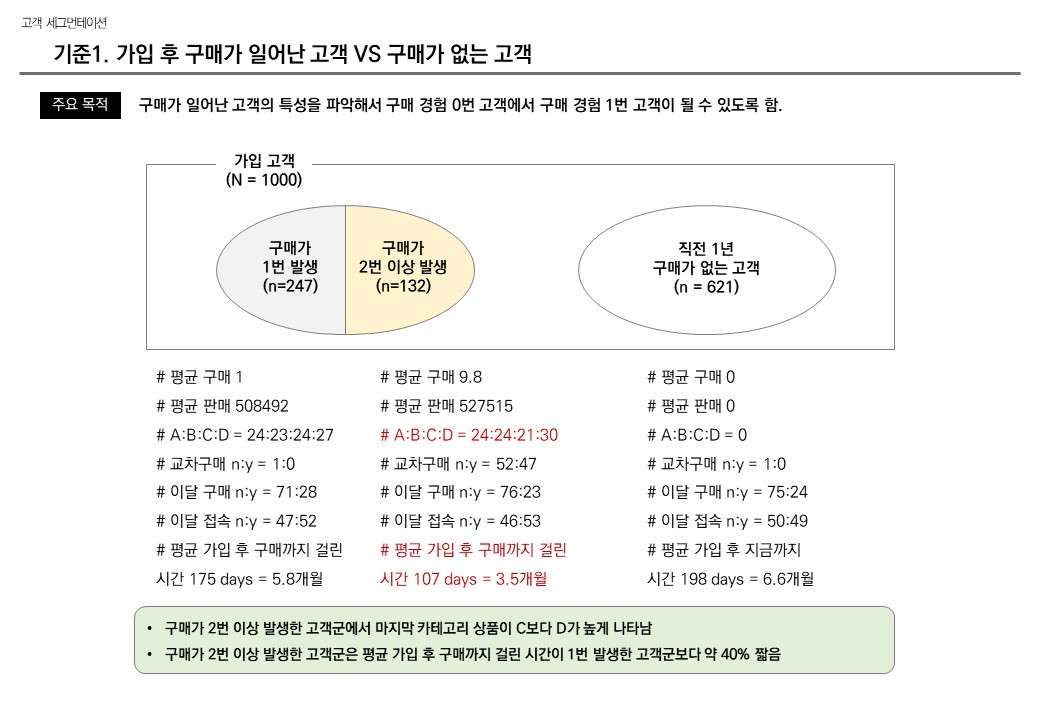

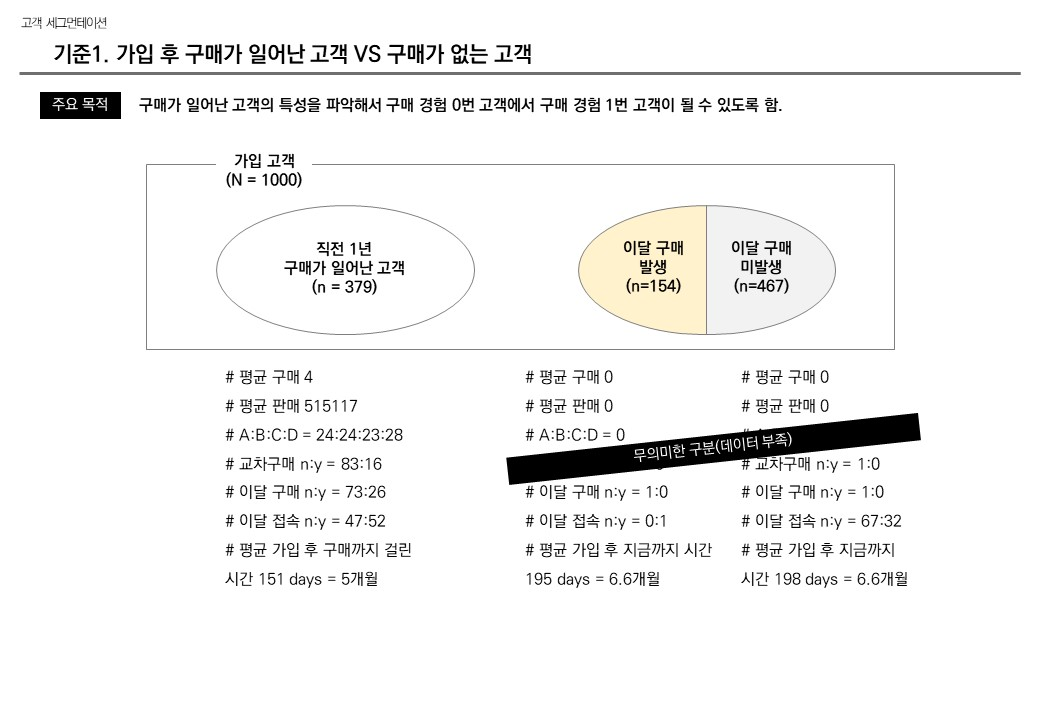

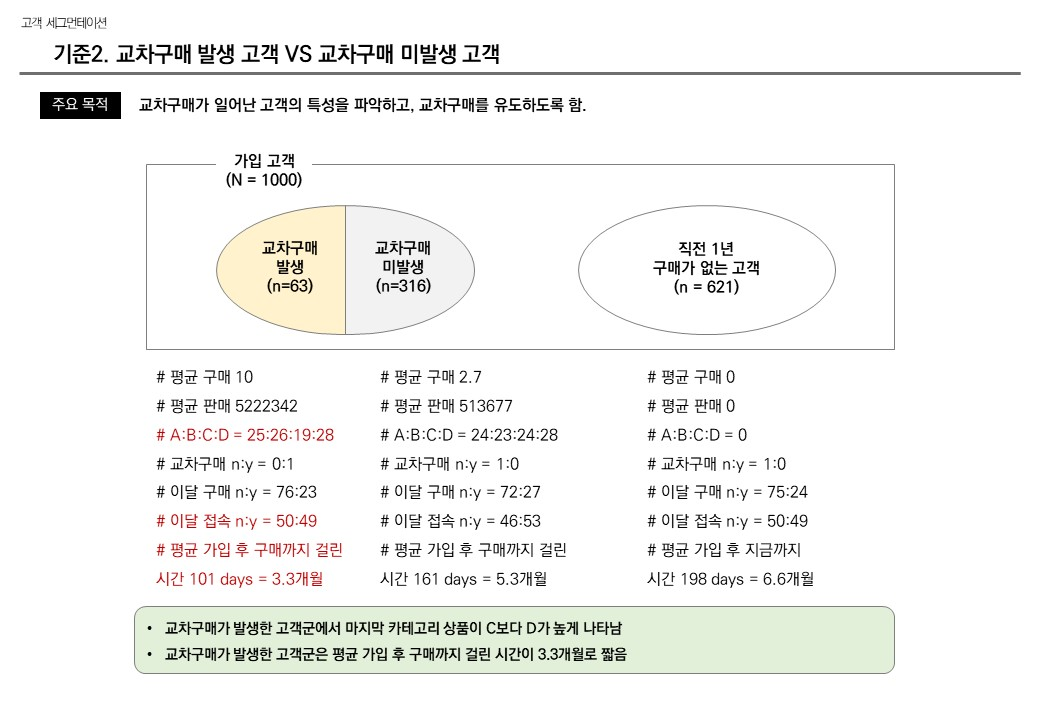

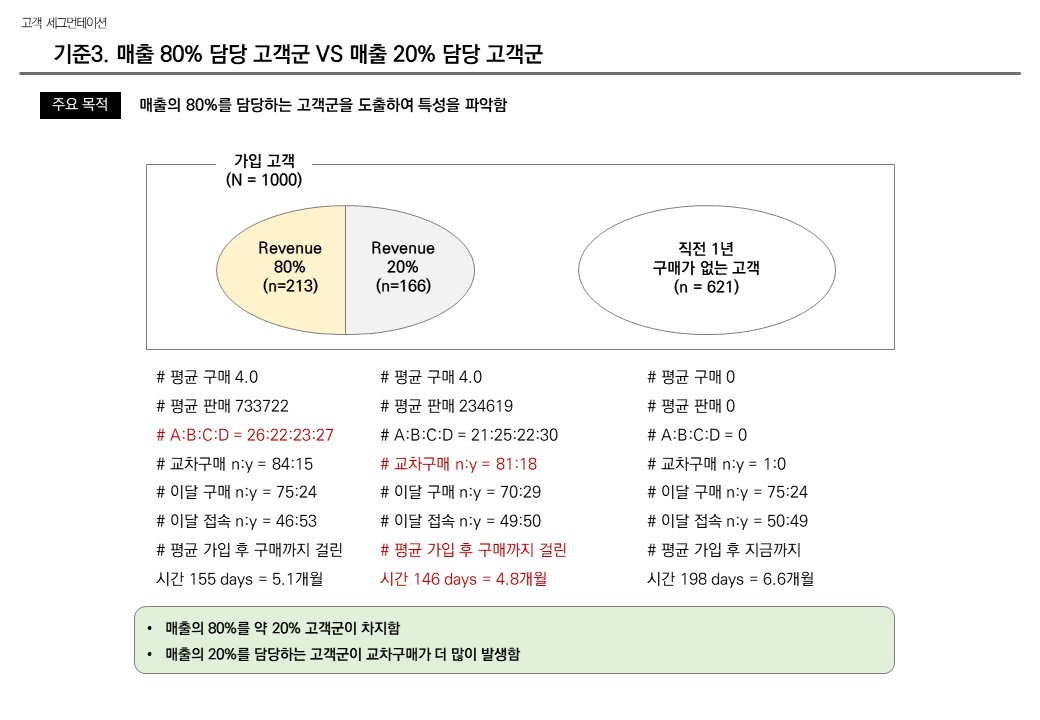